# WEB SCRAPING

Importamos paquetes necesarios


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

Obtenemos las URL de todas las páginas con noticias de la VIU

In [3]:
def obtener_enlaces(num_pag):
  j=0
  enlaces_noticias=[]
  enlaces_paginas=[]
  for j in range(0,num_pag):
    if j == 0:
      URL = "https://www.universidadviu.com/es/actualidad/noticias?buscar=&fecha=&field_shared_category_target_id=All&field_shared_tag_target_id=All"
    else:
      URL = "https://www.universidadviu.com/es/actualidad/noticias?buscar=&fecha=&field_shared_category_target_id=All&field_shared_tag_target_id=All&page="+str(j)
    enlaces_paginas.append(URL)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    enlace_pagina=soup.find_all('div', class_="views-row")
    for i in range(len(enlace_pagina)):
      enlaces_noticias.append("https://www.universidadviu.com"+str(enlace_pagina[i].find("a").attrs["href"]))
  return enlaces_paginas, enlaces_noticias


In [4]:
enlaces_paginas, enlaces_noticias=obtener_enlaces(49)

Nos aseguramos de tener todas las páginas detectadas (actualmente a fecha 01/09/2023 la VIU presenta 49 paginas).

In [5]:
len(enlaces_paginas)

49

Del mismo modo, nos aseguramos de tener todas las noticias de la VIU detectadas (vemos que OK, pues hay 49 páginas con 16 noticias cada una,por lo que 49x16=784 OK)

In [6]:
len(enlaces_noticias)

784

\\Vamos extrayendo el contenido de las diferentes noticias, se añade un contador que se muestra por pantalla, para ir viendo el número de extracciones ya realizadas.

In [7]:
def obtener_contenido(enlaces_noticias):
  contenidos=[]
  contador=0
  for i in enlaces_noticias:
    page = requests.get(i)
    soup = BeautifulSoup(page.content, "html.parser")
    if soup.find("script", type="application/ld+json")!=None:
      contenidos.append([json.loads(soup.find("script", type="application/ld+json").text)["@graph"][0]["articleBody"]])
      contador+=1
    print(contador)
  return contenidos



In [8]:
contenidos=obtener_contenido(enlaces_noticias)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Cada contenido es una lista dentro de la lista "contenidos", de esta forma podemos acceder fácil al contenido y podemos mapearlo con la noticia en cuestión si fuera necesario.

In [9]:
len(contenidos)

784

Compruebo un contenido al azar

In [10]:
contenidos[701]

['\r\n\r\n\r\n\tLas escritoras Espido Freire y Vanessa Monfort formarán parte del jurado que elegirá los mejores textos de los estudiantes\r\n\r\n\r\nLa Universidad Internacional de Valencia y Grupo Planeta celebrarán la clausura de la primera edición de su Máster en Creación Literaria el próximo 12 de julio a las 19:30 en la Sala Valle-Inclán del Círculo de Bellas Artes de Madrid. Durante la Velada se dará lectura a una selección de textos de los mejores trabajos fin de máster del presente curso académico que serán leídos por sus creadores y de los que se seleccionarán tres finalistas que serán reconocidos con el premio a la excelencia y que además serán evaluados por un equipo de editores del Grupo Planeta.\r\n\r\nEl jurado estará compuesto por Ana Gavín, codirectora del Máster en Creación Literaria y directora de Relaciones Editoriales del Grupo Planeta, la también codirectora del máster Espido Freire, escritora y Premio Planeta, y Vanessa Monfort, profesora del máster, novelista y 

Como hemos dicho el contenido de cada noticias es una lista dentro de "contenidos", en este caso es una lista de longitud 1, luego para poder trabajar sobre el texto propiamente dicho del contenido, debemos poner [0].

In [11]:
contenidos[701][0]

'\r\n\r\n\r\n\tLas escritoras Espido Freire y Vanessa Monfort formarán parte del jurado que elegirá los mejores textos de los estudiantes\r\n\r\n\r\nLa Universidad Internacional de Valencia y Grupo Planeta celebrarán la clausura de la primera edición de su Máster en Creación Literaria el próximo 12 de julio a las 19:30 en la Sala Valle-Inclán del Círculo de Bellas Artes de Madrid. Durante la Velada se dará lectura a una selección de textos de los mejores trabajos fin de máster del presente curso académico que serán leídos por sus creadores y de los que se seleccionarán tres finalistas que serán reconocidos con el premio a la excelencia y que además serán evaluados por un equipo de editores del Grupo Planeta.\r\n\r\nEl jurado estará compuesto por Ana Gavín, codirectora del Máster en Creación Literaria y directora de Relaciones Editoriales del Grupo Planeta, la también codirectora del máster Espido Freire, escritora y Premio Planeta, y Vanessa Monfort, profesora del máster, novelista y d

Veamos el número de caracteres de una noticia al azar

In [12]:
len(contenidos[701][0])

2594

# PROCESAMIENTO

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from gensim.corpora import Dictionary

In [14]:
def preprocesamiento(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminamos las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    #Eliminamos otros espacios en blanco forzados en lenguaje HTML
    texto = re.sub(r'nbsp', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [15]:
for i in range(len(contenidos)):
  contenidos[i][0]=preprocesamiento(contenidos[i][0])


Guardamos los contenidos sin procesar paras los modelos que tienen procesamientos propios.

In [16]:
contenidosPLSA=contenidos
contenidosLSTM=contenidos

Veamos su resultado, sobre el contenido que mostramos con anterioridad (contenido noticia 0)

In [17]:
contenidos[701][0]

' las escritoras espido freire vanessa monfort formarán parte del jurado que elegirá los mejores textos de los estudiantes la universidad internacional de valencia grupo planeta celebrarán la clausura de la primera edición de su máster en creación literaria el próximo 12 de julio las 19 30 en la sala valle inclán del círculo de bellas artes de madrid durante la velada se dará lectura una selección de textos de los mejores trabajos fin de máster del presente curso académico que serán leídos por sus creadores de los que se seleccionarán tres finalistas que serán reconocidos con el premio la excelencia que además serán evaluados por un equipo de editores del grupo planeta el jurado estará compuesto por ana gavín codirectora del máster en creación literaria directora de relaciones editoriales del grupo planeta la también codirectora del máster espido freire escritora premio planeta vanessa monfort profesora del máster novelista dramaturga el acto estará moderado por maria rosell coordinado

In [18]:
len(contenidos[701][0])

2441

Los espacios ocasionados por el preprocesamiento no son importantes, pues el tokenizar en el paso a continuación desaparecerán.

In [19]:
tokenizer = ToktokTokenizer()
for i in range(len(contenidos)):
  contenidos[i][0]=tokenizer.tokenize(contenidos[i][0])


Veamos el resultado

In [20]:
contenidos[701][0]

['las',
 'escritoras',
 'espido',
 'freire',
 'vanessa',
 'monfort',
 'formarán',
 'parte',
 'del',
 'jurado',
 'que',
 'elegirá',
 'los',
 'mejores',
 'textos',
 'de',
 'los',
 'estudiantes',
 'la',
 'universidad',
 'internacional',
 'de',
 'valencia',
 'grupo',
 'planeta',
 'celebrarán',
 'la',
 'clausura',
 'de',
 'la',
 'primera',
 'edición',
 'de',
 'su',
 'máster',
 'en',
 'creación',
 'literaria',
 'el',
 'próximo',
 '12',
 'de',
 'julio',
 'las',
 '19',
 '30',
 'en',
 'la',
 'sala',
 'valle',
 'inclán',
 'del',
 'círculo',
 'de',
 'bellas',
 'artes',
 'de',
 'madrid',
 'durante',
 'la',
 'velada',
 'se',
 'dará',
 'lectura',
 'una',
 'selección',
 'de',
 'textos',
 'de',
 'los',
 'mejores',
 'trabajos',
 'fin',
 'de',
 'máster',
 'del',
 'presente',
 'curso',
 'académico',
 'que',
 'serán',
 'leídos',
 'por',
 'sus',
 'creadores',
 'de',
 'los',
 'que',
 'se',
 'seleccionarán',
 'tres',
 'finalistas',
 'que',
 'serán',
 'reconocidos',
 'con',
 'el',
 'premio',
 'la',
 'excelenc

In [21]:
contenidosLSTM=contenidos

In [22]:
len(contenidos[701][0])

364

Ahora eliminamos aquellas palabras que no aportan significado y los dígitos que pueda haber en el contenido.

In [23]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("spanish"))

def filtro(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS
            and not token.isdigit()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
for i in range(len(contenidos)):
  contenidos[i][0]=filtro(contenidos[i][0])


Veamos el resultado

In [25]:
contenidos[701][0]

['escritoras',
 'espido',
 'freire',
 'vanessa',
 'monfort',
 'formarán',
 'parte',
 'jurado',
 'elegirá',
 'mejores',
 'textos',
 'estudiantes',
 'universidad',
 'internacional',
 'valencia',
 'grupo',
 'planeta',
 'celebrarán',
 'clausura',
 'primera',
 'edición',
 'máster',
 'creación',
 'literaria',
 'próximo',
 'julio',
 'sala',
 'valle',
 'inclán',
 'círculo',
 'bellas',
 'artes',
 'madrid',
 'velada',
 'dará',
 'lectura',
 'selección',
 'textos',
 'mejores',
 'trabajos',
 'fin',
 'máster',
 'presente',
 'curso',
 'académico',
 'leídos',
 'creadores',
 'seleccionarán',
 'tres',
 'finalistas',
 'reconocidos',
 'premio',
 'excelencia',
 'además',
 'evaluados',
 'equipo',
 'editores',
 'grupo',
 'planeta',
 'jurado',
 'compuesto',
 'ana',
 'gavín',
 'codirectora',
 'máster',
 'creación',
 'literaria',
 'directora',
 'relaciones',
 'editoriales',
 'grupo',
 'planeta',
 'codirectora',
 'máster',
 'espido',
 'freire',
 'escritora',
 'premio',
 'planeta',
 'vanessa',
 'monfort',
 'profe

In [26]:
len(contenidos[701][0])

214

Como vemos se ha reducido el número de palabras considerablemente tras el preprocesamiento y el filtro

Por último lematizamos las palabras, en busca de su raíz.

In [27]:
stemmer = SnowballStemmer("spanish")

def stemming(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

In [28]:
for i in range(len(contenidos)):
  contenidos[i][0]=stemming(contenidos[i][0])

Veamos el resultado

In [29]:
contenidos[701][0]

['escritor',
 'espid',
 'freir',
 'vaness',
 'monfort',
 'form',
 'part',
 'jur',
 'eleg',
 'mejor',
 'text',
 'estudi',
 'univers',
 'internacional',
 'valenci',
 'grup',
 'planet',
 'celebr',
 'clausur',
 'primer',
 'edicion',
 'mast',
 'creacion',
 'literari',
 'proxim',
 'juli',
 'sal',
 'vall',
 'inclan',
 'circul',
 'bell',
 'artes',
 'madr',
 'vel',
 'dar',
 'lectur',
 'seleccion',
 'text',
 'mejor',
 'trabaj',
 'fin',
 'mast',
 'present',
 'curs',
 'academ',
 'leid',
 'creador',
 'seleccion',
 'tres',
 'final',
 'reconoc',
 'premi',
 'excelent',
 'ademas',
 'evalu',
 'equip',
 'editor',
 'grup',
 'planet',
 'jur',
 'compuest',
 'ana',
 'gavin',
 'codirector',
 'mast',
 'creacion',
 'literari',
 'director',
 'relacion',
 'editorial',
 'grup',
 'planet',
 'codirector',
 'mast',
 'espid',
 'freir',
 'escritor',
 'premi',
 'planet',
 'vaness',
 'monfort',
 'profesor',
 'mast',
 'novel',
 'dramaturg',
 'acto',
 'moder',
 'mari',
 'rosell',
 'coordin',
 'mast',
 'creacion',
 'literar

El número de palabras tiene que seguir siendo el mismo

In [30]:
len(contenidos[701][0])

214

In [31]:
tokens=[]
for i in range(len(contenidos)):
   tokens.append(contenidos[i][0])

In [32]:
len(tokens)

784

In [33]:
contador=0
for i in range(len(tokens)): contador+=len(tokens[i])
print("Número de tokens", contador)


Número de tokens 393374


In [34]:
diccionario=Dictionary(tokens)

In [35]:
len(diccionario)

15119

Veamos los elementos del diccionario

In [36]:
list (diccionario.items ())

[(0, 'abuel'),
 (1, 'academ'),
 (2, 'acced'),
 (3, 'acces'),
 (4, 'aceler'),
 (5, 'activ'),
 (6, 'actualiz'),
 (7, 'ademas'),
 (8, 'administr'),
 (9, 'agradec'),
 (10, 'agradezc'),
 (11, 'ahor'),
 (12, 'algui'),
 (13, 'algun'),
 (14, 'alla'),
 (15, 'amig'),
 (16, 'analit'),
 (17, 'anhel'),
 (18, 'anunci'),
 (19, 'aplic'),
 (20, 'apoy'),
 (21, 'aprend'),
 (22, 'aprovech'),
 (23, 'aquell'),
 (24, 'are'),
 (25, 'as'),
 (26, 'asi'),
 (27, 'asust'),
 (28, 'atad'),
 (29, 'ayud'),
 (30, 'ayudam'),
 (31, 'año'),
 (32, 'años'),
 (33, 'bec'),
 (34, 'becari'),
 (35, 'bonit'),
 (36, 'brind'),
 (37, 'busc'),
 (38, 'busqued'),
 (39, 'cab'),
 (40, 'cabez'),
 (41, 'cad'),
 (42, 'calendari'),
 (43, 'campus'),
 (44, 'canal'),
 (45, 'canc'),
 (46, 'cant'),
 (47, 'carrer'),
 (48, 'cerc'),
 (49, 'cerr'),
 (50, 'chic'),
 (51, 'cienci'),
 (52, 'ciud'),
 (53, 'ciudadan'),
 (54, 'clas'),
 (55, 'coleg'),
 (56, 'com'),
 (57, 'comenc'),
 (58, 'comenz'),
 (59, 'comercial'),
 (60, 'compart'),
 (61, 'comun'),
 (62, 

In [37]:
diccionario.filter_extremes(no_below=2, no_above = 0.66)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 8445


A continuación creamos el corpus, de forma que tendremos en los documentos cada palabra indexada y con el recuento del número de veces que dicha palabra aparece en el documento.

In [38]:
# Creamos el corpus
corpus = [diccionario.doc2bow(contenidos[i][0]) for i in range(len(contenidos))]

In [39]:
len(corpus)

784

Veamos uno al azar

In [40]:
corpus[701]

[(1, 1),
 (20, 1),
 (44, 1),
 (82, 1),
 (91, 1),
 (101, 2),
 (103, 1),
 (112, 1),
 (119, 1),
 (121, 1),
 (128, 2),
 (129, 1),
 (134, 1),
 (154, 1),
 (167, 1),
 (179, 9),
 (185, 2),
 (199, 1),
 (219, 1),
 (222, 1),
 (231, 2),
 (241, 2),
 (245, 1),
 (249, 1),
 (264, 1),
 (272, 1),
 (277, 2),
 (295, 1),
 (308, 1),
 (312, 1),
 (316, 1),
 (321, 1),
 (328, 1),
 (353, 2),
 (365, 1),
 (394, 1),
 (398, 5),
 (399, 1),
 (409, 1),
 (412, 1),
 (436, 1),
 (444, 1),
 (480, 4),
 (481, 1),
 (497, 1),
 (570, 1),
 (575, 1),
 (589, 1),
 (597, 1),
 (679, 1),
 (771, 2),
 (847, 1),
 (871, 2),
 (960, 1),
 (1008, 1),
 (1017, 1),
 (1058, 1),
 (1077, 1),
 (1141, 1),
 (1168, 1),
 (1239, 1),
 (1245, 1),
 (1317, 1),
 (1383, 4),
 (1409, 1),
 (1414, 1),
 (1441, 1),
 (1527, 1),
 (1574, 2),
 (1884, 1),
 (1962, 5),
 (2021, 4),
 (2034, 1),
 (2068, 1),
 (2088, 2),
 (2194, 1),
 (2204, 2),
 (2205, 1),
 (2210, 3),
 (2214, 2),
 (2224, 2),
 (2239, 1),
 (2244, 1),
 (2258, 2),
 (2262, 1),
 (2264, 1),
 (2267, 1),
 (2269, 6),
 (22




# MODELO LSA


In [ ]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
def lsa_model(diccionario,corpus,num_topicos,palabras):
    # generate LSA model
    lsamodel = LsiModel(corpus, num_topics=num_topicos, id2word = diccionario,chunksize=800,random_seed=2, power_iters=10)  # train model
    print(lsamodel.print_topics(num_topics=num_topicos, num_words=palabras))
    return lsamodel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Buscamos el modelo que mayor coherencia tenga.

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def valores_coherencia_LSA(diccionario, corpus, noticias, limit, start, step):
  valores_coherencia_cv = []
  valores_coherencia_cuci = []
  valores_coherencia_umass = []
  lista_modelos = []
  for numero_topicos in range(start, limit, step):
    model=LsiModel(corpus, num_topics=numero_topicos, id2word = diccionario,chunksize=800,random_seed=2, power_iters=10)
    lista_modelos.append(model)
    coherencemodel_cv = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_v')
    valores_coherencia_cv.append(coherencemodel_cv.get_coherence())
    coherencemodel_cuci = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_uci')
    valores_coherencia_cuci.append(coherencemodel_cuci.get_coherence())
    coherencemodel_umass = CoherenceModel(model=model, corpus=corpus, dictionary=diccionario, coherence='u_mass')
    valores_coherencia_umass.append(coherencemodel_umass.get_coherence())
  return lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass = valores_coherencia_LSA(diccionario,corpus,[contenidos[i][0] for i in range(len(contenidos))],15,3,1)

In [ ]:
for i in range(len(lista_modelos)):
  print("El modelo",lista_modelos[i],"tiene un valor de coherencia cv de ",valores_coherencia_cv[i],"tiene un valor de coherencia cuci de ",valores_coherencia_cuci[i],"tiene un valor de coherencia umass de ",valores_coherencia_umass[i])

El modelo LsiModel<num_terms=8407, num_topics=3, decay=1.0, chunksize=800> tiene un valor de coherencia cv de  0.3104005872129462 tiene un valor de coherencia cuci de  -0.3525847281597377 tiene un valor de coherencia umass de  -0.80102517817296
El modelo LsiModel<num_terms=8407, num_topics=4, decay=1.0, chunksize=800> tiene un valor de coherencia cv de  0.44466534905493 tiene un valor de coherencia cuci de  -0.18947042835389258 tiene un valor de coherencia umass de  -1.1921234678645145
El modelo LsiModel<num_terms=8407, num_topics=5, decay=1.0, chunksize=800> tiene un valor de coherencia cv de  0.36827157717771664 tiene un valor de coherencia cuci de  -0.5144204461694198 tiene un valor de coherencia umass de  -1.1445943703441386
El modelo LsiModel<num_terms=8407, num_topics=6, decay=1.0, chunksize=800> tiene un valor de coherencia cv de  0.31732349999807513 tiene un valor de coherencia cuci de  -0.9650517516697467 tiene un valor de coherencia umass de  -1.445745831442289
El modelo LsiM

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Representamos gráficamente la evolución de las métricas de coherencia respecto al número de tópicos.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


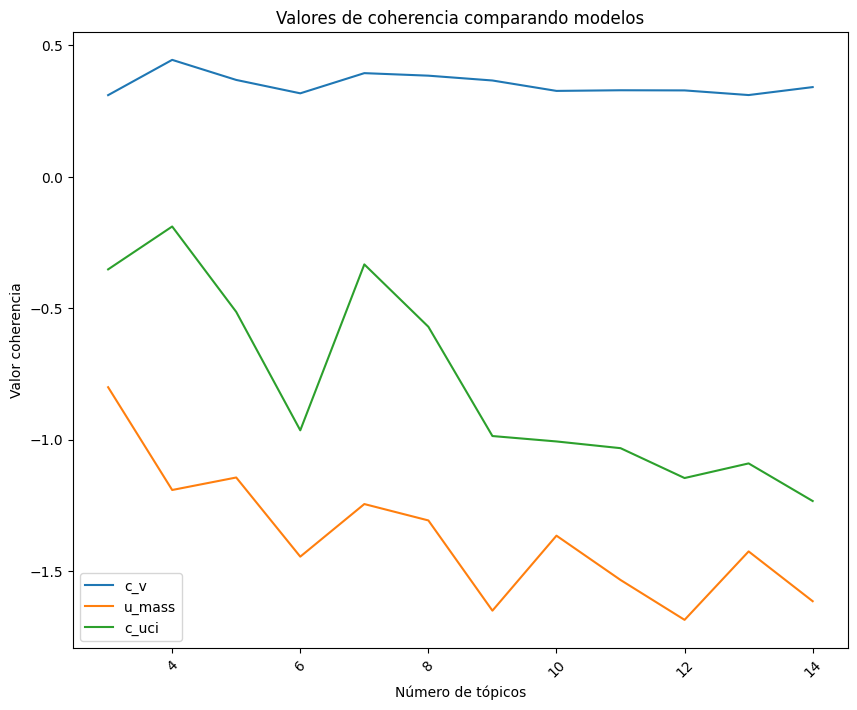

In [ ]:
# Show graph
import matplotlib.pyplot as plt
import numpy as np
numero_topicos=range(3,15,1)

plt.figure(figsize=(10,8))
plt.plot(numero_topicos,valores_coherencia_cv,label="c_v")
plt.plot(numero_topicos,valores_coherencia_umass,label="u_mass")
plt.plot(numero_topicos,valores_coherencia_cuci,label="c_uci")
plt.title("Valores de coherencia comparando modelos")
plt.xlabel("Número de tópicos")
plt.ylabel("Valor coherencia")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
data = {
    'c_v': valores_coherencia_cv,
    'u_mass': valores_coherencia_umass,
    'c_uci': valores_coherencia_cuci,
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_lsa=pd.DataFrame(columns=['c_v', 'u_mass', 'c_uci'])
for i in range(len(numero_topicos)):
  df_lsa.loc[str(i+3)+" tópicos"]=[valores_coherencia_cv[i],valores_coherencia_umass[i],valores_coherencia_cuci[i]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_lsa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,c_v,u_mass,c_uci
3 tópicos,0.310401,-0.801025,-0.352585
4 tópicos,0.444665,-1.192123,-0.189470
5 tópicos,0.368272,-1.144594,-0.514420
6 tópicos,0.317323,-1.445746,-0.965052
7 tópicos,0.394116,-1.245644,-0.333678
8 tópicos,0.384489,-1.307973,-0.571014
9 tópicos,0.366169,-1.651300,-0.986812
10 tópicos,0.326541,-1.365944,-1.007407
11 tópicos,0.328985,-1.534494,-1.032971
12 tópicos,0.328412,-1.686313,-1.146623


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entrenamos el modelo que presenta la mayor coherencia global y mostramos la distribución de sus tópicos.

In [ ]:
LSA=LsiModel(corpus, num_topics=4, id2word = diccionario,chunksize=800,random_seed=2, power_iters=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [ ]:
topicos = LSA.print_topics(num_words=8, num_topics=4)
for topico in topicos:
    print(topico)

(0, '0.209*"investig" + 0.176*"trabaj" + 0.173*"person" + 0.149*"educ" + 0.138*"profesional" + 0.135*"salud" + 0.128*"hac" + 0.128*"social"')
(1, '0.459*"educ" + 0.230*"investig" + 0.222*"proyect" + -0.189*"person" + 0.175*"alumn" + 0.165*"docent" + 0.144*"premi" + -0.139*"mayor"')
(2, '0.557*"investig" + -0.365*"educ" + 0.268*"salud" + -0.181*"derech" + 0.153*"grup" + -0.140*"alumn" + 0.110*"trabaj" + 0.105*"sanitari"')
(3, '0.353*"investig" + -0.310*"person" + -0.289*"salud" + 0.253*"derech" + 0.223*"human" + -0.211*"mayor" + -0.203*"educ" + -0.136*"psicolog"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# MODELO PLSA


Importamos la librería PLSA y sus métodos necesarios.

In [41]:
!pip install plsa
from plsa import Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
from plsa.corpus import Corpus
from plsa.preprocessors import remove_non_ascii,to_lower,remove_numbers,remove_tags,remove_punctuation,tokenize,RemoveStopwords,LemmatizeWords,remove_short_words

In [42]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Aplicamos el procesamiento adecuado y estándar de esta librería.

In [43]:
contenidos_PLSA=[]
pipeline = Pipeline(*DEFAULT_PIPELINE)
for i in range(len(contenidosPLSA)):
  contenidos_PLSA.append(pipeline.process(contenidosPLSA[i][0]))

In [44]:
tokens=[]
for i in range(len(contenidos_PLSA)):
   tokens.append(contenidos_PLSA[i])

Realizamos comprobaciones

In [45]:
diccionario=Dictionary(tokens)
len(diccionario)

11865

In [46]:
# Creamos el corpus
corpus = [diccionario.doc2bow(contenidos_PLSA[i]) for i in range(len(contenidos_PLSA))]

In [47]:
corpus_PLSA=Corpus([contenidosPLSA[i] for i in range(len(contenidosPLSA))],pipeline)

In [48]:
len(corpus_PLSA.vocabulary)

11865

Buscamos el mejor modelo.

In [ ]:
numero_topicos=range(3,15,1)
coherencecv=[]
coherencecuci=[]
coherencecumass=[]
for i in numero_topicos:
  plsa = PLSA(corpus_PLSA, i, True)
  result = plsa.fit()
  palabras=[]
  palabras_topico=[]
  for i in result.word_given_topic:
    for j in range(len(i)):
      palabras_topico.append(i[j][0])
    palabras.append(palabras_topico)
    palabras_topico=[]
  cv = CoherenceModel(topics=palabras, texts=tokens, dictionary=diccionario,coherence='c_v')
  cuci = CoherenceModel(topics=palabras, texts=tokens, dictionary=diccionario, coherence='c_uci')
  cumass = CoherenceModel(topics=palabras, corpus=corpus, dictionary=diccionario, coherence='u_mass')
  coherencecv.append(cv.get_coherence())  # get coherence value
  coherencecuci.append(cuci.get_coherence())
  coherencecumass.append(cumass.get_coherence())
  palabras=[]


In [ ]:
df_plsa=pd.DataFrame(columns=['c_v', 'u_mass', 'c_uci'])
for i in range(len(numero_topicos)):
  df_plsa.loc[str(i+3)+" tópicos"]=[coherencecv[i],coherencecumass[i],coherencecuci[i]]
df_plsa

In [ ]:
# Show graph
import matplotlib.pyplot as plt
import numpy as np
numero_topicos=range(3,15,1)

plt.figure(figsize=(10,8))
plt.plot(numero_topicos,coherencecv,label="c_v")
plt.plot(numero_topicos,coherencecumass,label="u_mass")
plt.plot(numero_topicos,coherencecuci,label="c_uci")
plt.title("Valores de coherencia comparando modelos")
plt.xlabel("Número de tópicos")
plt.ylabel("Valor coherencia")
plt.legend()
plt.xticks(rotation=45)

plt.show()

Se entrena el mejor modelo en base a las métricas de coherencia.

In [53]:
plsa = PLSA(corpus_PLSA, 12, True)
result = plsa.fit()

In [54]:
result = plsa.best_of(5)

In [55]:
print(result.word_given_topic[0][0:8])
print(result.word_given_topic[1][0:8])
print(result.word_given_topic[2][0:8])
print(result.word_given_topic[3][0:8])
print(result.word_given_topic[4][0:8])
print(result.word_given_topic[5][0:8])
print(result.word_given_topic[6][0:8])
print(result.word_given_topic[7][0:8])
print(result.word_given_topic[8][0:8])
print(result.word_given_topic[9][0:8])
print(result.word_given_topic[10][0:8])
print(result.word_given_topic[11][0:8])

(('bec', 0.014401856202239391), ('educ', 0.010527577748729863), ('premi', 0.010254721967158134), ('ganador', 0.007332553726314673), ('alumn', 0.00654068043980905), ('edicion', 0.005554086478209783), ('aul', 0.005266583230001838), ('profesor', 0.005146301896253844))
(('sanitari', 0.010318985302897161), ('humaniz', 0.009699537349181648), ('pacient', 0.008433896540455552), ('salud', 0.0075390810857924075), ('enfermer', 0.007170714762567), ('cuid', 0.006571322104518007), ('canc', 0.006077140734944325), ('psicolog', 0.005974062870842196))
(('sue', 0.008049287232732827), ('matemat', 0.005982571442889697), ('vacun', 0.004990225733982677), ('graduacion', 0.0039098996420174805), ('person', 0.003713172779501834), ('cognit', 0.003241429458992672), ('mateu', 0.0030357959061291873), ('psicolog', 0.0029893453718380547))
(('conveni', 0.006810899689039668), ('acuerd', 0.006171265047160033), ('jurid', 0.00522136545666157), ('firm', 0.0051308197802825434), ('facult', 0.005129534516684848), ('colabor', 0

# MODELO LDA

In [ ]:
from gensim.models import LdaModel

In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

Buscamos el mejor modelo.

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def valores_coherencia_LDA(diccionario, corpus, noticias, limit, start=2, step=2):
  valores_coherencia_cv = []
  valores_coherencia_cuci = []
  valores_coherencia_umass = []
  lista_modelos = []
  for numero_topicos in range(start, limit, step):
    model=LdaModel(corpus=corpus, id2word=diccionario,num_topics=numero_topicos, random_state=1, chunksize=800, passes=10, alpha='auto')
    lista_modelos.append(model)
    coherencemodel_cv = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_v')
    valores_coherencia_cv.append(coherencemodel_cv.get_coherence())
    coherencemodel_cuci = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_uci')
    valores_coherencia_cuci.append(coherencemodel_cuci.get_coherence())
    coherencemodel_umass = CoherenceModel(model=model, corpus=corpus, dictionary=diccionario, coherence='u_mass')
    valores_coherencia_umass.append(coherencemodel_umass.get_coherence())
  return lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass

In [ ]:
lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass = valores_coherencia_LDA(diccionario,corpus,[contenidos[i][0] for i in range(len(contenidos))],15,3,1)

In [ ]:
for i in range(len(lista_modelos)):
  print("El modelo",lista_modelos[i],"tiene un valor de coherencia cv de ",valores_coherencia_cv[i],"tiene un valor de coherencia cuci de ",valores_coherencia_cuci[i],"tiene un valor de coherencia umass de ",valores_coherencia_umass[i])

El modelo LdaModel<num_terms=11803, num_topics=3, decay=0.5, chunksize=800> tiene un valor de coherencia cv de  0.33645728030028693 tiene un valor de coherencia cuci de  0.025548968961353863 tiene un valor de coherencia umass de  -0.6680693018532785
El modelo LdaModel<num_terms=11803, num_topics=4, decay=0.5, chunksize=800> tiene un valor de coherencia cv de  0.3734831950245707 tiene un valor de coherencia cuci de  0.03945070051906756 tiene un valor de coherencia umass de  -0.703221433917206
El modelo LdaModel<num_terms=11803, num_topics=5, decay=0.5, chunksize=800> tiene un valor de coherencia cv de  0.38292166405917455 tiene un valor de coherencia cuci de  0.026219902382781036 tiene un valor de coherencia umass de  -0.7749701693404688
El modelo LdaModel<num_terms=11803, num_topics=6, decay=0.5, chunksize=800> tiene un valor de coherencia cv de  0.3759031952840995 tiene un valor de coherencia cuci de  0.036853845368920383 tiene un valor de coherencia umass de  -0.7629583781215187
El m

Representamos la evolución de las métricas en base al número de tópicos.

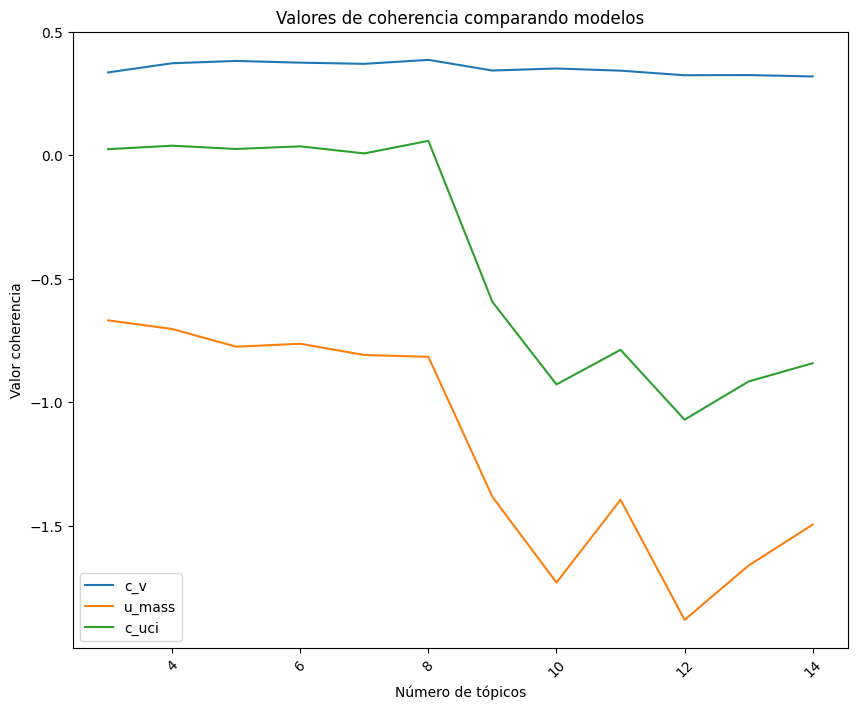

In [ ]:
# Show graph
import matplotlib.pyplot as plt
import numpy as np
numero_topicos=range(3,15,1)

plt.figure(figsize=(10,8))
plt.plot(numero_topicos,valores_coherencia_cv,label="c_v")
plt.plot(numero_topicos,valores_coherencia_umass,label="u_mass")
plt.plot(numero_topicos,valores_coherencia_cuci,label="c_uci")
plt.title("Valores de coherencia comparando modelos")
plt.xlabel("Número de tópicos")
plt.ylabel("Valor coherencia")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
data = {
    'c_v': valores_coherencia_cv,
    'u_mass': valores_coherencia_umass,
    'c_uci': valores_coherencia_cuci,
}

In [ ]:
df_lda=pd.DataFrame(columns=['c_v', 'u_mass', 'c_uci'])
for i in range(len(numero_topicos)):
  df_lda.loc[str(i+3)+" tópicos"]=[valores_coherencia_cv[i],valores_coherencia_umass[i],valores_coherencia_cuci[i]]

Sed muestran los valores de cada métrica para cada número de tópicos.

In [ ]:
df_lda

,c_v,u_mass,c_uci
3 tópicos,0.336457,-0.668069,0.025549
4 tópicos,0.373483,-0.703221,0.039451
5 tópicos,0.382922,-0.774970,0.026220
6 tópicos,0.375903,-0.762958,0.036854
7 tópicos,0.371154,-0.808533,0.008165
8 tópicos,0.387260,-0.815829,0.059124
9 tópicos,0.344044,-1.383375,-0.593422
10 tópicos,0.352283,-1.730505,-0.927779
11 tópicos,0.343484,-1.395093,-0.787499
12 tópicos,0.324891,-1.881662,-1.070610


In [ ]:
model=LdaModel(corpus=corpus, id2word=diccionario,num_topics=5, random_state=1, chunksize=800, passes=10, alpha='auto')

In [ ]:
topicos = model.print_topics(num_words=8, num_topics=5)
for topico in topicos:
    print(topico)

(0, '0.007*"hac" + 0.006*"deb" + 0.006*"part" + 0.006*"pod" + 0.006*"import" + 0.006*"cambi" + 0.005*"form" + 0.005*"ser"')
(1, '0.013*"person" + 0.009*"salud" + 0.009*"mayor" + 0.007*"psicolog" + 0.007*"investig" + 0.007*"trabaj" + 0.006*"form" + 0.006*"import"')
(2, '0.017*"univers" + 0.014*"investig" + 0.010*"viu" + 0.010*"cienci" + 0.009*"trabaj" + 0.009*"estudi" + 0.009*"bec" + 0.008*"conoc"')
(3, '0.018*"univers" + 0.016*"investig" + 0.012*"viu" + 0.010*"catedr" + 0.008*"director" + 0.007*"valenci" + 0.006*"salud" + 0.006*"desarroll"')
(4, '0.016*"univers" + 0.012*"educ" + 0.012*"viu" + 0.009*"estudi" + 0.008*"formacion" + 0.008*"valenci" + 0.008*"desarroll" + 0.008*"docent"')


Similitud entre textos (usando la distancia de Jensen-Shannon). Se propone como línea de investigación futura.

In [ ]:
from gensim.matutils import jensen_shannon

Usaremos la función que tiene gensim implementada

In [ ]:
def calcular_distanciajensen_shannon(doc_1, doc_2):

    return jensen_shannon(doc_1, doc_2)

Por otro lado, se puede utilizar la siguiente función para sugerir noticias similares a un usuario que esté buscando una noticia en concreto

In [ ]:
def similares(noticia, n_similares):
  distancias = [calcular_distanciajensen_shannon(lda.get_document_topics(corpus[noticia],
                                               minimum_probability=0), lda.get_document_topics(corpus[i],
                                               minimum_probability=0)) for i in range(len(corpus))]
  mas_similares = np.argsort(distancias)[0:n_similares] #usamos argsort porque queremos encontrar aquellas noticias con las distancias más bajas
  return mas_similares

Busquemos las 10 noticias más relacionadas con la informada, ponemos 11 ya que en principio la propia noticia tendrá la menor distancia con ella misma. Lo dejamos y no lo sacamos del bucle porque está bien para comprobar el resultado de la distancia.

In [ ]:
noticias_mas_similares=similares(701,11)

In [ ]:
noticias_mas_similares

array([701, 554, 495, 263, 159, 562, 629, 314, 516, 619, 387])

In [ ]:
for i in noticias_mas_similares:
  print(enlaces_noticias[i])

https://www.universidadviu.com/es/actualidad/noticias/santiago-posteguillo-premio-planeta-2018-impartira-una-masterclass-sobre-su
https://www.universidadviu.com/es/actualidad/noticias/la-universidad-internacional-de-valencia-y-aulaplaneta-lanzan-la-cuarta-edicion
https://www.universidadviu.com/es/actualidad/noticias/la-universidad-internacional-de-valencia-presenta-su-nueva-campana-invitando
https://www.universidadviu.com/es/actualidad/noticias/el-dr-cristobal-torres-fernandez-investigador-y-docente-de-viu-encabeza-la-fundacion-de-una-red-iberoamericana-de-investigacion-educativa
https://www.universidadviu.com/es/actualidad/noticias/las-i-jornadas-de-la-catedra-en-neurociencia-global-y-cambio-social-se-celebran-con-exito-de-participacion
https://www.universidadviu.com/es/actualidad/noticias/el-periodista-presentador-y-docente-de-viu-vicente-valles-recibe-el-premio-de
https://www.universidadviu.com/es/actualidad/noticias/la-universidad-internacional-de-valencia-se-adapta-las-nuevas-tend

# MODELO HDP

Se incorpora la librería y los métodos necesarios.

In [ ]:
from gensim.models import HdpModel
from gensim.models.coherencemodel import CoherenceModel

En este algoritmo el número de tópicos no es un parámetro de entrada necesario, sin embargo, se forzará que lo sea mediante el truncamiento del árbol jerárquico, que se realiza mediante el parámetro de entrada T de la función HdpModel.

---



In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def valores_coherencia_HDP(diccionario, corpus, noticias, limit, start=2, step=2):
  valores_coherencia_cv = []
  valores_coherencia_cuci = []
  valores_coherencia_umass = []
  lista_modelos = []
  for numero_topicos in range(start, limit, step):
    model=HdpModel(corpus=corpus, id2word=diccionario,chunksize=800, random_state=2,max_chunks=10,T=numero_topicos)
    lista_modelos.append(model)
    coherencemodel_cv = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_v')
    valores_coherencia_cv.append(coherencemodel_cv.get_coherence())
    coherencemodel_cuci = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_uci')
    valores_coherencia_cuci.append(coherencemodel_cuci.get_coherence())
    coherencemodel_umass = CoherenceModel(model=model, corpus=corpus, dictionary=diccionario, coherence='u_mass')
    valores_coherencia_umass.append(coherencemodel_umass.get_coherence())
  return lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass

In [ ]:
lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass = valores_coherencia_HDP(diccionario,corpus,[contenidos[i][0] for i in range(len(contenidos))],15,3,1)

In [ ]:
for i in range(len(lista_modelos)):
  print("El modelo",lista_modelos[i],"tiene un valor de coherencia cv de ",valores_coherencia_cv[i],"tiene un valor de coherencia cuci de ",valores_coherencia_cuci[i],"tiene un valor de coherencia umass de ",valores_coherencia_umass[i])

El modelo <gensim.models.hdpmodel.HdpModel object at 0x7f642db1d5a0> tiene un valor de coherencia cv de  0.44666576485574505 tiene un valor de coherencia cuci de  -3.974316043639691 tiene un valor de coherencia umass de  -6.934188577679169
El modelo <gensim.models.hdpmodel.HdpModel object at 0x7f644252f9d0> tiene un valor de coherencia cv de  0.522342454378989 tiene un valor de coherencia cuci de  -6.2631991801325615 tiene un valor de coherencia umass de  -9.550548411410704
El modelo <gensim.models.hdpmodel.HdpModel object at 0x7f644252f880> tiene un valor de coherencia cv de  0.524111992221294 tiene un valor de coherencia cuci de  -6.575268339384377 tiene un valor de coherencia umass de  -10.00582758624492
El modelo <gensim.models.hdpmodel.HdpModel object at 0x7f64394f47c0> tiene un valor de coherencia cv de  0.533970508466658 tiene un valor de coherencia cuci de  -6.742416852751077 tiene un valor de coherencia umass de  -10.014338858647758
El modelo <gensim.models.hdpmodel.HdpModel o

Se muestra la evolución de las métricas de coherencia en base a los diferentes modelo variando el número de tópicos truncados.

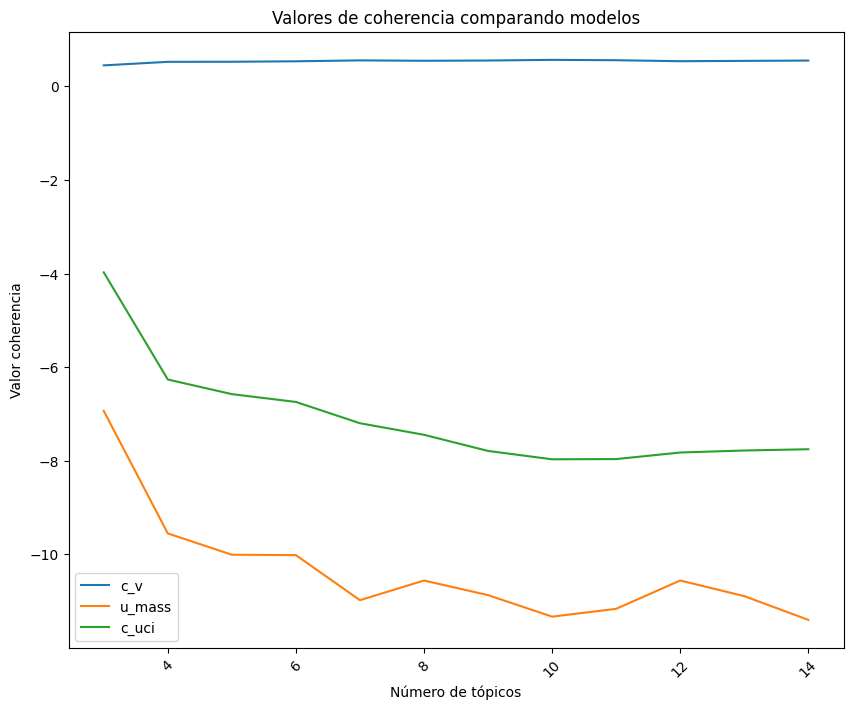

In [ ]:
# Show graph
import matplotlib.pyplot as plt
import numpy as np
numero_topicos=range(3,15,1)

plt.figure(figsize=(10,8))
plt.plot(numero_topicos,valores_coherencia_cv,label="c_v")
plt.plot(numero_topicos,valores_coherencia_umass,label="u_mass")
plt.plot(numero_topicos,valores_coherencia_cuci,label="c_uci")
plt.title("Valores de coherencia comparando modelos")
plt.xlabel("Número de tópicos")
plt.ylabel("Valor coherencia")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
data = {
    'c_v': valores_coherencia_cv,
    'u_mass': valores_coherencia_umass,
    'c_uci': valores_coherencia_cuci,
}

In [ ]:
df_HDP=pd.DataFrame(columns=['c_v', 'u_mass', 'c_uci'])
for i in range(len(numero_topicos)):
  df_HDP.loc[str(i+3)+" tópicos"]=[valores_coherencia_cv[i],valores_coherencia_umass[i],valores_coherencia_cuci[i]]

In [ ]:
df_HDP

,c_v,u_mass,c_uci
3 tópicos,0.446666,-6.934189,-3.974316
4 tópicos,0.522342,-9.550548,-6.263199
5 tópicos,0.524112,-10.005828,-6.575268
6 tópicos,0.533971,-10.014339,-6.742417
7 tópicos,0.553298,-10.976602,-7.196939
8 tópicos,0.544994,-10.556443,-7.444030
9 tópicos,0.550327,-10.868911,-7.788933
10 tópicos,0.564579,-11.328454,-7.967206
11 tópicos,0.556926,-11.161200,-7.962470
12 tópicos,0.535697,-10.556178,-7.822411


In [ ]:
model=HdpModel(corpus=corpus, id2word=diccionario,chunksize=800, random_state=2,max_chunks=10,T=3)

Se muestra la distribución de los tópicos del mejor modelo.

In [ ]:
model.print_topics(3,8)

[(0,
  '0.005*investig + 0.004*trabaj + 0.004*educ + 0.003*profesional + 0.003*person + 0.003*mast + 0.003*salud + 0.003*proyect'),
 (1,
  '0.001*person + 0.001*mast + 0.001*dia + 0.001*investig + 0.001*hac + 0.001*educ + 0.001*mejor + 0.001*comun'),
 (2,
  '0.001*tragic + 0.001*sacied + 0.001*empuj + 0.001*rev + 0.001*obstaculiz + 0.001*cortoplac + 0.001*perdon + 0.001*elev')]

# MODELO NNMF

In [ ]:
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

Buscamos el mejor modelo en base a las métricas de coherencia.

In [ ]:
def valores_coherencia_NNMF(diccionario, corpus, noticias, start, limit, step):
  valores_coherencia_cv = []
  valores_coherencia_cuci = []
  valores_coherencia_umass = []
  lista_modelos = []
  for numero_topicos in range(start, limit, step):
    model=Nmf(corpus=corpus, id2word=diccionario, num_topics=numero_topicos,chunksize=800, random_state=2, passes=10,normalize=True)
    lista_modelos.append(model)
    coherencemodel_cv = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_v')
    valores_coherencia_cv.append(coherencemodel_cv.get_coherence())
    coherencemodel_cuci = CoherenceModel(model=model, texts=tokens, dictionary=diccionario,coherence='c_uci')
    valores_coherencia_cuci.append(coherencemodel_cuci.get_coherence())
    coherencemodel_umass = CoherenceModel(model=model, corpus=corpus, dictionary=diccionario, coherence='u_mass')
    valores_coherencia_umass.append(coherencemodel_umass.get_coherence())
  return lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass

In [ ]:
lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass = valores_coherencia_NNMF(diccionario,corpus,[contenidos[i][0] for i in range(len(contenidos))],3,15,1)

In [ ]:
for i in range(len(lista_modelos)):
  print("El modelo",lista_modelos[i],"tiene un valor de coherencia cv de ",valores_coherencia_cv[i],"tiene un valor de coherencia cuci de ",valores_coherencia_cuci[i],"tiene un valor de coherencia umass de ",valores_coherencia_umass[i])

El modelo <gensim.models.nmf.Nmf object at 0x78d76fbc2bf0> tiene un valor de coherencia cv de  0.434404777557623 tiene un valor de coherencia cuci de  0.18225780572972386 tiene un valor de coherencia umass de  -0.8994572998108175
El modelo <gensim.models.nmf.Nmf object at 0x78d770a6ff40> tiene un valor de coherencia cv de  0.32360315809864104 tiene un valor de coherencia cuci de  -0.008018079384065483 tiene un valor de coherencia umass de  -0.8313489866634451
El modelo <gensim.models.nmf.Nmf object at 0x78d7729ac0d0> tiene un valor de coherencia cv de  0.3898163700079835 tiene un valor de coherencia cuci de  0.10333835213758982 tiene un valor de coherencia umass de  -0.8870656779025972
El modelo <gensim.models.nmf.Nmf object at 0x78d770bc0550> tiene un valor de coherencia cv de  0.41118681064100143 tiene un valor de coherencia cuci de  -0.0729629456831708 tiene un valor de coherencia umass de  -1.1569133046405728
El modelo <gensim.models.nmf.Nmf object at 0x78d77b1737f0> tiene un valor

Representemos los valores de coherencia obtenidos atendiendo al número de tópicos.

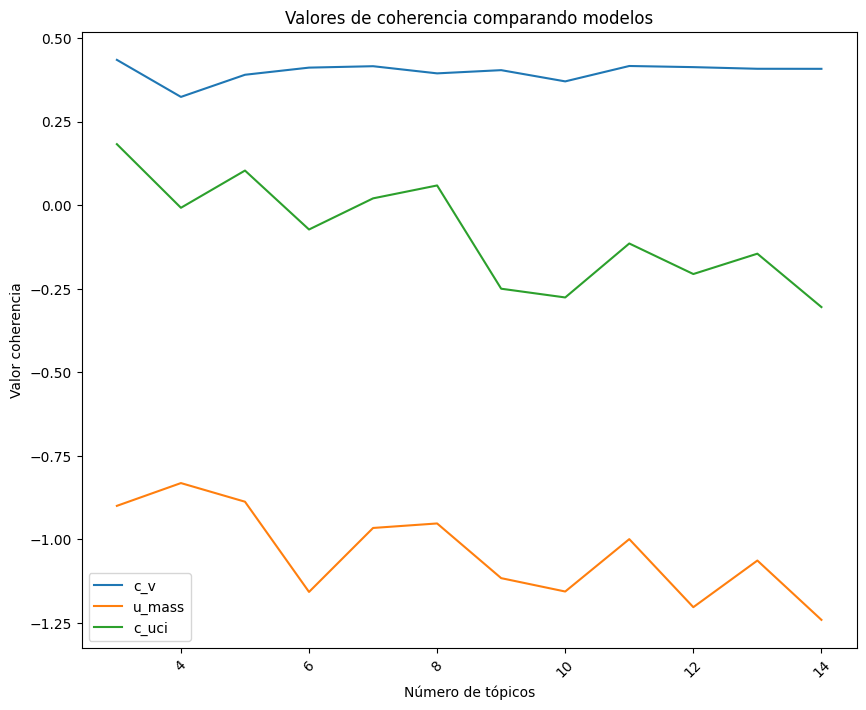

In [ ]:
# Show graph
import matplotlib.pyplot as plt
import numpy as np
numero_topicos=range(3,15,1)

plt.figure(figsize=(10,8))
plt.plot(numero_topicos,valores_coherencia_cv,label="c_v")
plt.plot(numero_topicos,valores_coherencia_umass,label="u_mass")
plt.plot(numero_topicos,valores_coherencia_cuci,label="c_uci")
plt.title("Valores de coherencia comparando modelos")
plt.xlabel("Número de tópicos")
plt.ylabel("Valor coherencia")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
data = {
    'c_v': valores_coherencia_cv,
    'u_mass': valores_coherencia_umass,
    'c_uci': valores_coherencia_cuci,
}

In [ ]:
df_nnmf=pd.DataFrame(columns=['c_v', 'u_mass', 'c_uci'])
for i in range(len(numero_topicos)):
  df_nnmf.loc[str(i+3)+" tópicos"]=[valores_coherencia_cv[i],valores_coherencia_umass[i],valores_coherencia_cuci[i]]

In [ ]:
df_nnmf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,c_v,u_mass,c_uci
3 tópicos,0.434405,-0.899457,0.182258
4 tópicos,0.323603,-0.831349,-0.008018
5 tópicos,0.389816,-0.887066,0.103338
6 tópicos,0.411187,-1.156913,-0.072963
7 tópicos,0.415418,-0.965588,0.020184
8 tópicos,0.394013,-0.952122,0.058781
9 tópicos,0.403619,-1.115691,-0.250058
10 tópicos,0.370034,-1.155680,-0.276200
11 tópicos,0.416059,-0.999020,-0.114782
12 tópicos,0.412660,-1.202470,-0.206158


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entrenamos el mejor modelo y mostrmos los tópicos y su distribución.

In [ ]:
NNMF=Nmf(corpus=corpus, id2word=diccionario, num_topics=7,chunksize=800, random_state=2, passes=10,normalize=True)

In [ ]:
topicos = NNMF.print_topics(num_words=8, num_topics=7)
for topico in topicos:
    print(topico)

(0, '0.012*"social" + 0.009*"hac" + 0.007*"pod" + 0.007*"ser" + 0.006*"cienci" + 0.005*"deb" + 0.004*"libr" + 0.004*"cre"')
(1, '0.024*"profesional" + 0.018*"salud" + 0.014*"sanitari" + 0.013*"trabaj" + 0.011*"enfermer" + 0.009*"cuid" + 0.009*"mejor" + 0.009*"enferm"')
(2, '0.027*"educ" + 0.011*"alumn" + 0.010*"proyect" + 0.009*"mast" + 0.009*"docent" + 0.009*"premi" + 0.009*"tecnolog" + 0.009*"formacion"')
(3, '0.036*"person" + 0.029*"mayor" + 0.010*"activ" + 0.010*"radi" + 0.007*"realiz" + 0.006*"social" + 0.006*"energ" + 0.005*"comun"')
(4, '0.028*"derech" + 0.022*"human" + 0.008*"polit" + 0.007*"guerr" + 0.007*"pais" + 0.006*"crimen" + 0.006*"penal" + 0.005*"deb"')
(5, '0.052*"investig" + 0.021*"grup" + 0.016*"proyect" + 0.010*"salud" + 0.008*"dra" + 0.007*"dr" + 0.006*"realiz" + 0.006*"psicolog"')
(6, '0.017*"trabaj" + 0.012*"riesg" + 0.009*"laboral" + 0.007*"prevencion" + 0.006*"psicolog" + 0.006*"salud" + 0.006*"ser" + 0.005*"si"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# MODELO CTM

Se importan las librerías y paquetes necesarios

In [59]:
!pip install tomotopy
import tomotopy as tp
from tomotopy import CTModel, utils, coherence

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 6.0 MB/s eta 0:00:00


In [52]:
from tomotopy.utils import Corpus
corpus_ctm = tp.utils.Corpus()
for i in tokens:
    corpus_ctm.add_doc(i)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def valores_coherencia_CTM(diccionario, corpus, noticias, limit, start, step):
  valores_coherencia_cv = []
  valores_coherencia_cuci = []
  valores_coherencia_umass = []
  lista_modelos = []
  for numero_topicos in range(start, limit, step):
    ctm=CTModel(tw=tp.TermWeight.PMI,k=numero_topicos, smoothing_alpha=0.1, eta=0.01, seed=2, corpus=corpus_ctm)
    ctm.train(10)
    lista_modelos.append(ctm)
    coherencemodel_cv = tp.coherence.Coherence(ctm, coherence='c_v')
    valores_coherencia_cv.append(coherencemodel_cv.get_score())
    coherencemodel_cuci = tp.coherence.Coherence(ctm, coherence='c_uci')
    valores_coherencia_cuci.append(coherencemodel_cuci.get_score())
    coherencemodel_umass =tp.coherence.Coherence(ctm, coherence='u_mass')
    valores_coherencia_umass.append(coherencemodel_umass.get_score())
  return lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass

Se busca el mejor modelo atendiendo al número de tópicos.

In [ ]:
lista_modelos, valores_coherencia_cv,valores_coherencia_cuci,valores_coherencia_umass = valores_coherencia_CTM(diccionario,corpus,[contenidos[i][0] for i in range(len(contenidos))],15,3,1)

<ipython-input-140-bdf3bbf4c511>:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  ctm.train(10)


In [ ]:
for i in range(len(lista_modelos)):
  print("El modelo",lista_modelos[i],"tiene un valor de coherencia cv de ",valores_coherencia_cv[i],"tiene un valor de coherencia cuci de ",valores_coherencia_cuci[i],"tiene un valor de coherencia umass de ",valores_coherencia_umass[i])

El modelo <tomotopy.CTModel object at 0x7f64333f4870> tiene un valor de coherencia cv de  0.4854020174592734 tiene un valor de coherencia cuci de  -0.1806435421611725 tiene un valor de coherencia umass de  -0.8830764171444899
El modelo <tomotopy.CTModel object at 0x7f642e6c2ab0> tiene un valor de coherencia cv de  0.5190740728750824 tiene un valor de coherencia cuci de  -0.40081769270876794 tiene un valor de coherencia umass de  -1.1256500799573441
El modelo <tomotopy.CTModel object at 0x7f642ed2f4f0> tiene un valor de coherencia cv de  0.4047969073429704 tiene un valor de coherencia cuci de  -1.2338919250337999 tiene un valor de coherencia umass de  -1.293849955945602
El modelo <tomotopy.CTModel object at 0x7f642da2c4f0> tiene un valor de coherencia cv de  0.4031882094219326 tiene un valor de coherencia cuci de  -2.209163546994921 tiene un valor de coherencia umass de  -1.5887615564719342
El modelo <tomotopy.CTModel object at 0x7f6433c0c0b0> tiene un valor de coherencia cv de  0.43773

Se muestra la evolución de las métricas.

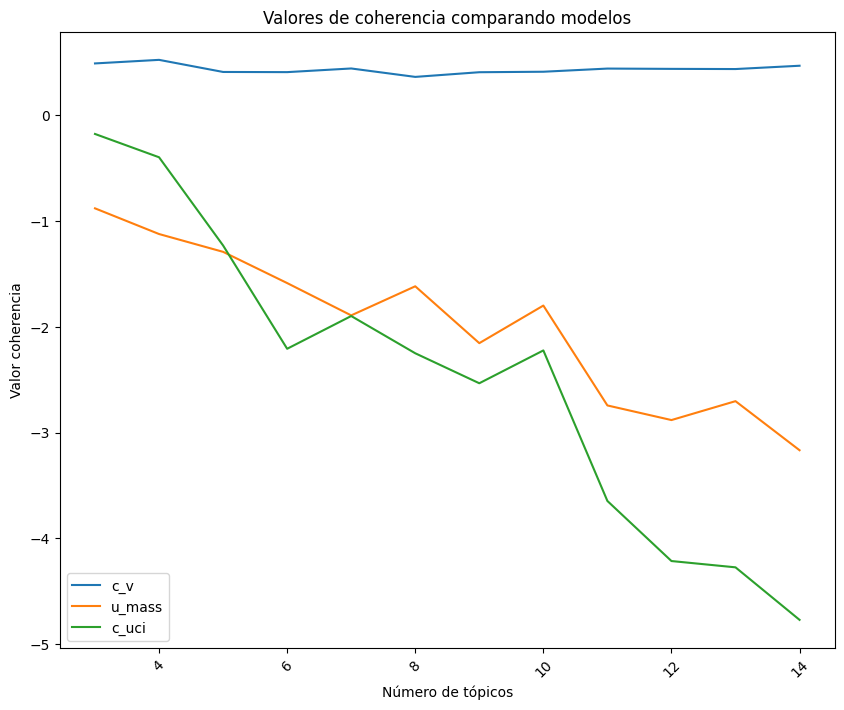

In [ ]:
# Show graph
import matplotlib.pyplot as plt
import numpy as np
numero_topicos=range(3,15,1)

plt.figure(figsize=(10,8))
plt.plot(numero_topicos,valores_coherencia_cv,label="c_v")
plt.plot(numero_topicos,valores_coherencia_umass,label="u_mass")
plt.plot(numero_topicos,valores_coherencia_cuci,label="c_uci")
plt.title("Valores de coherencia comparando modelos")
plt.xlabel("Número de tópicos")
plt.ylabel("Valor coherencia")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
data = {
    'c_v': valores_coherencia_cv,
    'u_mass': valores_coherencia_umass,
    'c_uci': valores_coherencia_cuci,
}

In [ ]:
df_ctm=pd.DataFrame(columns=['c_v', 'u_mass', 'c_uci'])
for i in range(len(numero_topicos)):
  df_ctm.loc[str(i+3)+" tópicos"]=[valores_coherencia_cv[i],valores_coherencia_umass[i],valores_coherencia_cuci[i]]

In [ ]:
df_ctm

,c_v,u_mass,c_uci
3 tópicos,0.485402,-0.883076,-0.180644
4 tópicos,0.519074,-1.125650,-0.400818
5 tópicos,0.404797,-1.293850,-1.233892
6 tópicos,0.403188,-1.588762,-2.209164
7 tópicos,0.437730,-1.893901,-1.899888
8 tópicos,0.358222,-1.619149,-2.251635
9 tópicos,0.402358,-2.156056,-2.534792
10 tópicos,0.406887,-1.801119,-2.224801
11 tópicos,0.436757,-2.744289,-3.646282
12 tópicos,0.433963,-2.882318,-4.213604


Se entrena el meejor modelo para los dos tipos de matriz de pesos posibles.

In [ ]:
ctm=CTModel(tw=tp.TermWeight.ONE, min_cf=0, min_df=0, rm_top=0, k=3, smoothing_alpha=0.1, eta=0.01, seed=2, corpus=corpus_ctm)
ctm.train(100)
print(ctm.get_topic_words(0,8))
print(ctm.get_topic_words(1,8))
print(ctm.get_topic_words(2,8))

[('investig', 0.013426139950752258), ('viu', 0.00805877335369587), ('profesional', 0.007577086333185434), ('pued', 0.00737064890563488), ('univers', 0.007187149487435818), ('import', 0.006521962583065033), ('relacion', 0.0063308170065283775), ('proyect', 0.006284942384809256)]
[('internacional', 0.010745775885879993), ('educ', 0.007418075576424599), ('hac', 0.007217797450721264), ('viu', 0.006855756044387817), ('formacion', 0.006801834795624018), ('social', 0.006200999952852726), ('años', 0.005969909951090813), ('proces', 0.005862067919224501)]
[('estudi', 0.010113179683685303), ('person', 0.009279975667595863), ('univers', 0.008958925493061543), ('pued', 0.00807985756546259), ('part', 0.008011060766875744), ('com', 0.007239009719341993), ('comun', 0.006948534864932299), ('conoc', 0.006856806110590696)]


<ipython-input-155-a9030ae72290>:2: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  ctm.train(100)


In [53]:
ctm=CTModel(tw=tp.TermWeight.PMI, min_cf=0, min_df=0, rm_top=0, k=3, smoothing_alpha=0.1, eta=0.01, seed=2, corpus=corpus_ctm)
ctm.train(100)
print(ctm.get_topic_words(0,8))
print(ctm.get_topic_words(1,8))
print(ctm.get_topic_words(2,8))

[('univers', 0.004381431266665459), ('psicolog', 0.004295894410461187), ('digital', 0.0036724598612636328), ('estudi', 0.0036225684452801943), ('pacient', 0.0033403346315026283), ('experient', 0.003133834805339575), ('profesional', 0.002918427111580968), ('trastorn', 0.002888828283175826)]
[('educ', 0.004723229445517063), ('investig', 0.004367448855191469), ('proyect', 0.004334434866905212), ('violenci', 0.004030301701277494), ('premi', 0.004002693109214306), ('sanitari', 0.00396097544580698), ('derech', 0.003868682775646448), ('music', 0.003627251833677292)]
[('salud', 0.004221657756716013), ('curs', 0.0038825408555567265), ('laboral', 0.003294670954346657), ('viu', 0.003220669459551573), ('desarroll', 0.003058399772271514), ('catedr', 0.0030325085390359163), ('mediacion', 0.003002948360517621), ('trabaj', 0.002884877612814307)]


<ipython-input-53-b63ae9607b58>:2: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  ctm.train(100)


In [54]:
from tomotopy import Document
etiquetas=[]
for i in ctm.docs:
  etiquetas.append(Document.get_topics(i)[0][0])


# EnsembleLDA

Se importan los paquetes y métodos necesarios.

In [ ]:
from gensim.models import EnsembleLda

Se buscan los tópicos, poniendo el límite superior en los 10 tópicos más coherentes.

In [ ]:
eLDA = EnsembleLda(corpus=corpus, id2word=diccionario, num_topics=10, num_models=30, passes=10)

Se muestran los tópicos obtenidos.

In [ ]:
eLDA.print_topics(5)

[(0,
  '0.025*"univers" + 0.016*"viu" + 0.011*"valenci" + 0.011*"estudi" + 0.011*"educ" + 0.010*"formacion" + 0.009*"desarroll" + 0.008*"investig" + 0.007*"docent" + 0.006*"tecnolog"'),
 (1,
  '0.015*"person" + 0.009*"mayor" + 0.009*"salud" + 0.007*"psicolog" + 0.007*"trabaj" + 0.007*"deb" + 0.006*"import" + 0.006*"com" + 0.006*"form" + 0.005*"hac"')]

In [ ]:
coherencemodel_cv = CoherenceModel(model=eLDA, texts=tokens, dictionary=diccionario,coherence='c_v')
valor_coherencia_cv=coherencemodel_cv.get_coherence()
coherencemodel_cuci = CoherenceModel(model=eLDA, texts=tokens, dictionary=diccionario,coherence='c_uci')
valor_coherencia_cuci=coherencemodel_cuci.get_coherence()
coherencemodel_umass = CoherenceModel(model=eLDA, corpus=corpus, dictionary=diccionario, coherence='u_mass')
valor_coherencia_umass=coherencemodel_umass.get_coherence()

Se obtienen las métricas.

In [ ]:
print(valor_coherencia_cv)
print(valor_coherencia_cuci)
print(valor_coherencia_umass)

0.39405841925506746
0.0789144784816739
-0.5616196639102105


# Redes neuronales recurrentes (LSTM bidireccional)

Lo emplearemos para el diario La Razón, para ello extraeremos 280 noticias de cada una de las 9 secciones principales de su web.Para ello extraeremos noticias de las 20 primeras páginas de cada sección, pues hay 14 noticias en cada página. En total extaeremos 2520 noticias.

In [ ]:
temas=["espana","internacional","economia","sociedad","opinion","deportes","cultura","salud","gente"]
enlace_noticias=[]
for t in temas:
  URL = "https://www.larazon.es/"+t+"/"
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, "html.parser")
  extracción1=soup.find_all("section", class_="row distributiva")
  for i in range(len(extracción1)):
    extracción2=extracción1[i].find_all("a", class_="article__media video")
    for j in range(len(extracción2)):
      enlace_noticias.append((extracción2[j].attrs["href"],t))
  print(len(enlace_noticias))
  for p in range(2,21):
    URL = "https://www.larazon.es/"+t+"/"+str(p)+"/"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    extracción1=soup.find_all("section", class_="row distributiva")
    for i in range(len(extracción1)):
      extracción2=extracción1[i].find_all("a", class_="article__media video")
      for j in range(len(extracción2)):
        enlace_noticias.append((extracción2[j].attrs["href"],t))
    print(len(enlace_noticias))



14
28
42
56
70
84
98
112
126
140
154
168
182
196
210
224
238
252
266
280
294
308
322
336
350
364
378
392
406
420
434
448
462
476
490
504
518
532
546
560
574
588
602
616
630
644
658
672
686
700
714
728
742
756
770
784
798
812
826
840
854
868
882
896
910
924
938
952
966
980
994
1008
1022
1036
1050
1064
1078
1092
1106
1120
1134
1148
1162
1176
1190
1204
1218
1232
1246
1260
1274
1288
1302
1316
1330
1344
1358
1372
1386
1400
1414
1428
1442
1456
1470
1484
1498
1512
1526
1540
1554
1568
1582
1596
1610
1624
1638
1652
1666
1680
1694
1708
1722
1736
1750
1764
1778
1792
1806
1820
1834
1848
1862
1876
1890
1904
1918
1932
1946
1960
1974
1988
2002
2016
2030
2044
2058
2072
2086
2100
2114
2128
2142
2156
2170
2184
2198
2212
2226
2240
2254
2268
2282
2296
2310
2324
2338
2352
2366
2380
2394
2408
2422
2436
2450
2464
2478
2492
2506
2520


In [ ]:
enlace_noticias

[('https://www.larazon.es/espana/insta-sanchez-dejar-tomar-sol-conocer-realidad-migratoria-canarias_2023081464da452c9598e30001bdc7f5.html',
  'espana'),
 ('https://www.larazon.es/espana/armada-despliega-buque-otan-mediterraneo-vigilar-buques-rusos_2023081464da31739598e30001bd99d6.html',
  'espana'),
 ('https://www.larazon.es/espana/aboga-investidura-rapida-gobierno-solitario-feijoo_2023081464da2807714dff000107da00.html',
  'espana'),
 ('https://www.larazon.es/espana/ayuso-critica-condecoracion-gamez-cese-cobos-siguiente-otorgar-gran-cruz-orden-isabel-catolica-puigdemont_2023081464da20655df8e30001cb61a7.html',
  'espana'),
 ('https://www.larazon.es/espana/junts-apura-final-decidira-mismo-jueves-entrega-presidencia-congreso-psoe_2023081464da19d79598e30001bd6133.html',
  'espana'),
 ('https://www.larazon.es/espana/familiares-presos-manifestaran-bilbao-que-etarras-vuelvan-casa_2023081464da0b2d714dff0001078d74.html',
  'espana'),
 ('https://www.larazon.es/espana/sumar-pide-papel-importante-

In [ ]:
lista = enlace_noticias
mi_path = "/content/enlaces.txt"

with open(mi_path, 'a+') as f:
    for i in lista:
        f.write(str(i))

In [ ]:
len(enlace_noticias)

2520

In [ ]:
contenidos=[]
contador=0


for i in enlace_noticias:
  if len(i[0])>2 and "directo" not in str(i[0]):
    print(i[0])
    page = requests.get(i[0])
    soup = BeautifulSoup(page.content, "html.parser")
    if soup.find("script", type="application/ld+json")!=None:
      if "articleBody" in json.loads(soup.find("script", type="application/ld+json").text):
        contenidos.append([json.loads(soup.find("script", type="application/ld+json").text)["articleBody"],i[1]])
        contador+=1
        print(contador)

https://www.larazon.es/espana/insta-sanchez-dejar-tomar-sol-conocer-realidad-migratoria-canarias_2023081464da452c9598e30001bdc7f5.html
1
https://www.larazon.es/espana/armada-despliega-buque-otan-mediterraneo-vigilar-buques-rusos_2023081464da31739598e30001bd99d6.html
2
https://www.larazon.es/espana/aboga-investidura-rapida-gobierno-solitario-feijoo_2023081464da2807714dff000107da00.html
3
https://www.larazon.es/espana/ayuso-critica-condecoracion-gamez-cese-cobos-siguiente-otorgar-gran-cruz-orden-isabel-catolica-puigdemont_2023081464da20655df8e30001cb61a7.html
4
https://www.larazon.es/espana/junts-apura-final-decidira-mismo-jueves-entrega-presidencia-congreso-psoe_2023081464da19d79598e30001bd6133.html
5
https://www.larazon.es/espana/familiares-presos-manifestaran-bilbao-que-etarras-vuelvan-casa_2023081464da0b2d714dff0001078d74.html
6
https://www.larazon.es/espana/sumar-pide-papel-importante-mesa-congreso-reconoce-contactos-junts_2023081464da0376714dff0001077a7b.html
7
https://www.larazon.

Solo quitaremos los caracteres especiales y elementos forzados de HTML, es decir realizaremos la acción de nuestra función "preprocesamiento". Sin embargo, no eliminaremos stopwords ni realizaremos "stemming" porque en LSTM interesa mantener la coherencia y trazabilidad de la oración al completo.

In [ ]:
for i in range(len(contenidos)):
  contenidos[i][0]=preprocesamiento(contenidos[i][0])


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional,BatchNormalization,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam

df = pd.DataFrame(contenidos)

print(df)

                                                      0       1
0     el verano ha disparado la llegada de migrantes...  espana
1     las fuerzas armadas españolas comienzan el vie...  espana
2     el coordinador general del pp diputado naciona...  espana
3     en sus redes sociales ayuso ha hecho un parale...  espana
4     hasta el final con la incógnita la constitució...  espana
...                                                 ...     ...
2488  ya avisó él que esto va para largo así que nad...   gente
2489  durante veinticinco años patricia cerezo fue l...   gente
2490  a pesar de sus firmes intenciones de permanece...   gente
2491  tamara falcó no está tan lejos como para olvid...   gente
2492  albert rivera se encuentra viviendo su primer ...   gente

[2493 rows x 2 columns]


In [ ]:
df.columns = ['contenido', 'etiqueta']
df

,contenido,etiqueta
0,el verano ha disparado la llegada de migrantes...,espana
1,las fuerzas armadas españolas comienzan el vie...,espana
2,el coordinador general del pp diputado naciona...,espana
3,en sus redes sociales ayuso ha hecho un parale...,espana
4,hasta el final con la incógnita la constitució...,espana
...,...,...
2488,ya avisó él que esto va para largo así que nad...,gente
2489,durante veinticinco años patricia cerezo fue l...,gente
2490,a pesar de sus firmes intenciones de permanece...,gente
2491,tamara falcó no está tan lejos como para olvid...,gente


In [ ]:
mapeos = {
  0: "espana",
  1: "internacional",
  2: "economia",
  3: "sociedad",
  4: "opinion",
  5: "deportes",
  6: "cultura",
  7: "salud",
  8: "gente"
}

In [ ]:
df.drop(df[(df["contenido"].str.len()<200)].index,inplace=True)

In [ ]:
df['etiqueta'] = df['etiqueta'].replace(
  # Reemplaza cada valor por el valor en la segunda lista en el mismo índice del match.
  mapeos.values(), # Lista de Strings
  mapeos.keys() # Lista de Números
)
df

,contenido,etiqueta
0,el verano ha disparado la llegada de migrantes...,0
1,las fuerzas armadas españolas comienzan el vie...,0
2,el coordinador general del pp diputado naciona...,0
3,en sus redes sociales ayuso ha hecho un parale...,0
4,hasta el final con la incógnita la constitució...,0
...,...,...
2488,ya avisó él que esto va para largo así que nad...,8
2489,durante veinticinco años patricia cerezo fue l...,8
2490,a pesar de sus firmes intenciones de permanece...,8
2491,tamara falcó no está tan lejos como para olvid...,8


In [ ]:
train_data, test_data = train_test_split(df[['contenido', 'etiqueta']], test_size=0.1)

training_sentences = list(train_data['contenido'])
training_labels = list(train_data['etiqueta'])

testing_sentences = list(test_data['contenido'])
testing_labels = list(test_data['etiqueta'])
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
from keras.utils import to_categorical
training_labels_final=to_categorical(training_labels)
testing_labels_final=to_categorical(testing_labels)

In [ ]:
testing_labels_final[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
vocabulario= 20000   # limit vector of words to the top 20,000 words
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocabulario, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
testing_padded[0]

array([   14,   924,   416,     6,   541,     3,  1257,    93,     9,
        4303,  1278,    63,    19,  5280,  2384,     4,  1960,    10,
         394, 12306,    16,    42,  2311,    13,     7,   645,    23,
          14, 14739,    11,     4,   272,    14,   214,   924,     3,
         908,    35,    14,     1,     9,   103,    17,   235,     1,
        1990,    13,    12,   815,     2,     9,  4303,  1278,     5,
           1,    63, 10793,  7304,    17,   874,     2,    42,    14,
         113,     2,  7497,     4,     1,     5,  7101, 13280,     3,
        1219,   398,    20,  9005,   398,    14,   924,   416,     6,
         541,    21,    83,    13,     5,   114,     3,  1727,     2,
        3860,     2,    98,     8,   188,     2,   166,  5712,     3,
        7026,     2,    14,   363,     2,   407,    18,  3000,    16,
       16836,     5,   671,   927,     6,   541,     6,   449,   256,
         214,   129,    17,  1285,     4,     3,   924,   152,  4740,
         333,     4,

In [ ]:
!pip freeze
!pip install -q -U keras-tuner
import kerastuner as kt

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.1
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.1
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.6
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.1
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2023.8.0
datascience==0

<ipython-input-20-6143d6335671>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def model_builder(hp):

  hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  hp_rate = hp.Float('rate', min_value = 0.2, max_value = 0.5, step = 0.1)
  hp_l2=hp.Choice('l2', values = [1e-2,2e-2, 1e-3,2e-3, 1e-4,2e-4])

  # Creamos la arquitectura LSTM
  embedding_vector_length = 64
  model = Sequential()
  model.add(Embedding(vocabulario, embedding_vector_length, input_length=max_length))
  model.add(Bidirectional(LSTM(90,recurrent_dropout=0.25,dropout=0.1)))
  model.add(Dense(units = hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_l2), activation='relu')),
  model.add(BatchNormalization()),
  model.add(Dropout(rate=hp_rate)),
  model.add(Dense(units = hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_l2), activation='relu')),
  model.add(BatchNormalization()),
  model.add(Dropout(rate=hp_rate)),
  model.add(Dense(9, activation='softmax'))
  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = hp_learning_rate), metrics=['accuracy'])
  return model



In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

import tensorflow as tf
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)


from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,Callback
parada_temprana = EarlyStopping(monitor='val_loss',patience=2, verbose=1,min_delta=1e-4)
reducir_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=1,verbose=1)
checkpoint = ModelCheckpoint(filepath='mejormodelo.h5',monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
callbacks_list = [parada_temprana, reducir_lr,ClearTrainingOutput(),checkpoint]

In [ ]:
tuner.search(padded, training_labels_final, epochs=10, validation_split=0.10, batch_size=32, callbacks = [callbacks_list])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
La optimización ha terminado. El número óptimo de neuronas en las capas densas es de {best_hps.get('units')} y , el porcentaje óptimo de dropout es {best_hps.get('rate')*100} y la tasa
optima de aprendizaje es de {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 10m 30s]
val_accuracy: 0.15837104618549347

Best val_accuracy So Far: 0.5475113391876221
Total elapsed time: 02h 03m 02s

La optimización ha terminado. El número óptimo de neuronas en las capas densas es de 32 y , el porcentaje óptimo de dropout es 20.0 y la tasa 
optima de aprendizaje es de 0.001.



Entrenamos el modelo que mejor precisión obtuvo

In [ ]:
# Creamos la arquitectura LSTM
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(vocabulario, embedding_vector_length, input_length=max_length))
model.add(Bidirectional(LSTM(90,recurrent_dropout=0.25,dropout=0.1)))
model.add(Dense(units = 32, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(rate=0.2)),
model.add(Dense(units = 32, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(rate=0.2)),
model.add(Dense(9, activation='softmax'))
print(model.summary())

precisiones=[]
contador=0
# Entrenamos el modelo
for i in [8,10,12,14,16] :
  for j in [32,64,128,256]:
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])
    model.fit(padded, training_labels_final, epochs=i, validation_split=0.1, batch_size=j,callbacks = [callbacks_list])
    # Evaluamos el modelo
    scores = model.evaluate(testing_padded, testing_labels_final, verbose=0)
    precisiones.append(scores[1]*100)
    print("Accuracy: %.2f%% para %a épocas y tamaño de lote %a" % (precisiones[contador],i,j))
    contador+=1

Accuracy: 5306.12% para 10 épocas y tamaño de lote 32
Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.9753
Epoch 1: val_accuracy did not improve from 0.57919
31/31 [==============================] - 45s 1s/step - loss: 0.1354 - accuracy: 0.9753 - val_loss: 2.1306 - val_accuracy: 0.5656 - lr: 0.0010
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9773
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 2: val_accuracy did not improve from 0.57919
31/31 [==============================] - 35s 1s/step - loss: 0.1170 - accuracy: 0.9773 - val_loss: 2.2496 - val_accuracy: 0.4661 - lr: 0.0010
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9803
Epoch 3: val_accuracy did not improve from 0.57919
31/31 [==============================] - 37s 1s/step - loss: 0.1088 - accuracy: 0.9803 - val_loss: 1.9623 - val_accuracy: 0.5204 - lr: 1.0000e-04
Epo

KeyboardInterrupt: ignored

# MODELO LLDA

Se importan los paquetes necesarios

In [ ]:
from tomotopy import LLDAModel

In [ ]:
llda=LLDAModel(tw=tp.TermWeight.PMI, k=3, alpha=0.1, eta=0.01, seed=2)
for i in range(len(tokens[0:624])):
  llda.add_doc(tokens[i], [str(etiquetas[i])])
llda.train(100)

<ipython-input-45-49b335bba981>:1: DeprecationWarning: `tomotopy.LLDAModel` is deprecated. Please use `tomotopy.PLDAModel` instead.
  llda=LLDAModel(tw=tp.TermWeight.PMI, min_cf=0, min_df=0, rm_top=0, k=3, alpha=0.1, eta=0.01, seed=2)


In [ ]:
for i in range(len(tokens[0:624])):
  llda.add_doc(tokens[i], [str(etiquetas[i])])

In [ ]:
predicciones=[]
for i in tokens[624:]:
  doc_nuevo = llda.make_doc(i)
  topic_dist= llda.infer(doc_nuevo)
  prediccion=topic_dist[0].argmax()
  predicciones.append(prediccion)

In [ ]:
len(predicciones)

156

Se realiza la matriz de confusión para evaluar la precisión y desempeño del modelo LLDA sobre las etiquetas proporcionadas por cada uno de los dos modelos no supervisados escogidos.

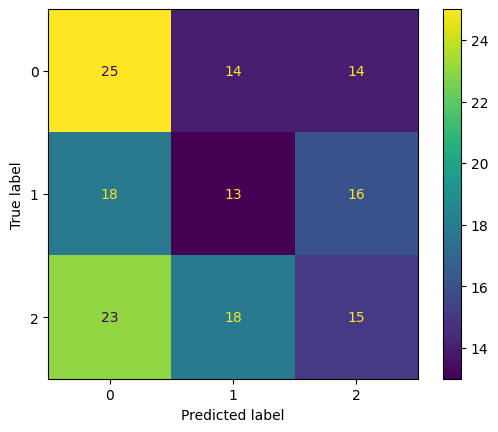

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(etiquetas[624:], predicciones)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()


In [ ]:
etiquetas=[]
for i in result.topic_given_doc:
  etiquetas.append(i.argmax())

In [ ]:
llda=LLDAModel(tw=tp.TermWeight.PMI, min_cf=0, min_df=0, rm_top=0, k=12, alpha=0.1, eta=0.01, seed=2)

<ipython-input-182-d16cb6e40ac7>:1: DeprecationWarning: `tomotopy.LLDAModel` is deprecated. Please use `tomotopy.PLDAModel` instead.
  llda=LLDAModel(tw=tp.TermWeight.PMI, min_cf=0, min_df=0, rm_top=0, k=12, alpha=0.1, eta=0.01, seed=2)


In [ ]:
for i in range(len(tokens[0:624])):
  llda.add_doc(tokens[i], [str(etiquetas[i])])

In [ ]:
llda.train(10)

<ipython-input-184-93ed5c96fdff>:1: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  llda.train(10)


In [ ]:
predicciones=[]
for i in tokens[624:]:
  doc_nuevo = llda.make_doc(i)
  topic_dist= llda.infer(doc_nuevo)
  prediccion=topic_dist[0].argmax()
  predicciones.append(prediccion)

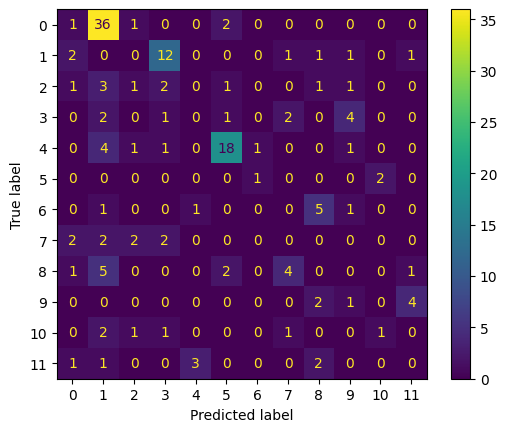

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(etiquetas[624:], predicciones)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

# Modelo SLDA

Se importan los paquetes necesarios.

In [ ]:
from tomotopy import SLDAModel

In [ ]:
from tomotopy import Document
etiquetas=[]
for i in ctm.docs:
  etiquetas.append(Document.get_topics(i)[0][0])

In [ ]:
slda=SLDAModel(tw=tp.TermWeight.ONE, k=3, vars='l', alpha=0.1, eta=0.01)
for i in range(len(tokens[0:624])):
  slda.add_doc(tokens[i], [etiquetas[i]])
slda.train(100)

In [ ]:
predicciones=[]
for i in tokens[624:]:
  doc_nuevo = slda.make_doc(i)
  topic_dist= slda.infer(doc_nuevo)
  prediccion=topic_dist[0].argmax()
  predicciones.append(prediccion)

Se realiza la matriz de confusión para evaluar la precisión y desempeño del modelo sLDA sobre las etiquetas proporcionadas por cada uno de los dos modelos no supervisados escogidos.

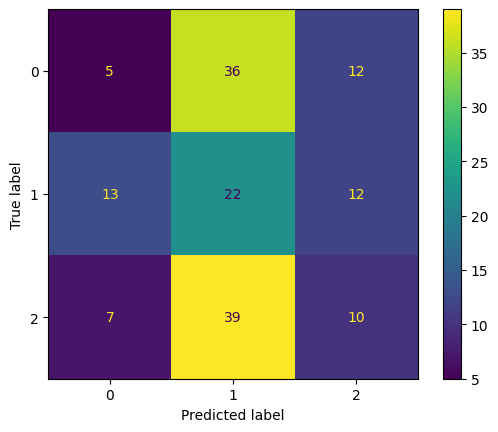

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(etiquetas[624:], predicciones)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()


In [ ]:
etiquetas=[]
for i in result.topic_given_doc:
  etiquetas.append(i.argmax())

In [ ]:
slda=SLDAModel(tw=tp.TermWeight.ONE, min_cf=0, min_df=0, rm_top=0, k=12, vars='l', alpha=0.1, eta=0.01)
for i in range(len(tokens[0:624])):
  slda.add_doc(tokens[i], [etiquetas[i]])

In [ ]:
slda.train(100)

In [ ]:
predicciones=[]
for i in tokens[624:]:
  doc_nuevo = slda.make_doc(i)
  topic_dist= slda.infer(doc_nuevo)
  prediccion=topic_dist[0].argmax()
  predicciones.append(prediccion)

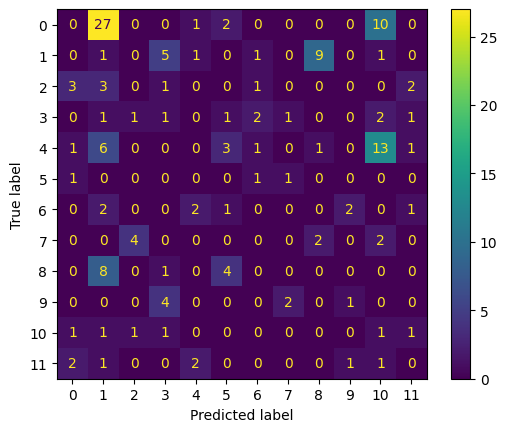

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(etiquetas[624:], predicciones)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2,3,4,5,6,7,8,9,10,11])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()


# LSTM VIU CTM

Análogo que para el periódico La Razón pero usando como etiquetas las dadas por el modelo CTM.

Solo quitaremos los caracteres especiales y elementos forzados de HTML, es decir realizaremos la acción de nuestra función "preprocesamiento". Sin embargo, no eliminaremos stopwords ni realizaremos "stemming" porque en LSTM interesa mantener la coherencia y trazabilidad de la oración al completo.

In [55]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional,BatchNormalization,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam

df = pd.DataFrame(contenidosLSTM)

print(df)

                                                     0
0    [bec, senescyt, viu, busc, impuls, mediant, fo...
1    [trat, proyect, investig, financi, viu, partic...
2    [docent, investig, facult, cienci, salud, viu,...
3    [aunqu, veran, present, peligr, exposicion, so...
4    [emprend, convert, met, gran, part, poblacion,...
..                                                 ...
779  [especializ, docenci, ingles, podr, curs, cinc...
780  [abiert, plaz, inscripcion, mast, prevencion, ...
781  [univers, internacional, valenci, ofrec, numer...
782  [public, orden, generalitat, valencian, enseñ,...
783  [valenci, univers, internacional, valencian, v...

[784 rows x 1 columns]


In [56]:
from tomotopy import Document
etiquetas=[]
for i in ctm.docs:
  etiquetas.append(Document.get_topics(i)[0][0])


In [57]:
df['etiqueta']=etiquetas
df.columns = ['contenido', 'etiqueta']
df

,contenido,etiqueta
0,"[bec, senescyt, viu, busc, impuls, mediant, fo...",2
1,"[trat, proyect, investig, financi, viu, partic...",2
2,"[docent, investig, facult, cienci, salud, viu,...",0
3,"[aunqu, veran, present, peligr, exposicion, so...",1
4,"[emprend, convert, met, gran, part, poblacion,...",0
...,...,...
779,"[especializ, docenci, ingles, podr, curs, cinc...",1
780,"[abiert, plaz, inscripcion, mast, prevencion, ...",1
781,"[univers, internacional, valenci, ofrec, numer...",1
782,"[public, orden, generalitat, valencian, enseñ,...",1


In [58]:
df.drop(df[(df["contenido"].str.len()<100)].index,inplace=True)

In [59]:
train_data, test_data = train_test_split(df[['contenido', 'etiqueta']], test_size=0.1)

training_sentences = list(train_data['contenido'])
training_labels = list(train_data['etiqueta'])

testing_sentences = list(test_data['contenido'])
testing_labels = list(test_data['etiqueta'])
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [60]:
from keras.utils import to_categorical
training_labels_final=to_categorical(training_labels)
testing_labels_final=to_categorical(testing_labels)

In [61]:
testing_labels_final[0]

array([0., 1., 0.], dtype=float32)

In [62]:
vocabulario= 20000   # limit vector of words to the top 20,000 words
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocabulario, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [63]:
testing_padded[0]

array([   49,  4626,  1818,   389,   578,   131,   688,   269,    44,
        1211,   351,  1092,   161,    21,   162, 13212,   223,   217,
          64,  2125,   256,   363,    48,  1668,   224,    57,   371,
         256,   213,   332,    27,    15,    24,    21,   228,  3376,
        1668,     1,  1502,  1376,  1327,   405,  1552,  1781,  1735,
          14,  3525,   378,   439,  1202,  1740,    15,    58,  2806,
         345,    31,   293,    89,    34,   120,   133,    30,   742,
           1,  1581,   554,  1113,    19,  2969,  2970,  1238,  1664,
         589,   283,    11,    33,    19,   617,   536,   482,   283,
        1362,   210,    11,   144,   331,   299,   717,   485,    55,
         362,   254,  1799,    33,    26,    22,   178,  1792,     6,
          64,    14,   320,   991,   430,   670,   179,   420,    81,
          11,    26,    22,   283,    70,  5342,  3173,  4079,  1264,
          23,   764,   501,   238,    15,   553,   248,    15,   126,
          33,    26,

In [64]:
!pip freeze
!pip install -q -U keras-tuner
import kerastuner as kt

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.2
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cached-property==1.5.2
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.6
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==

<ipython-input-64-6143d6335671>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Construcción del modelo.

In [65]:
def model_builder3(hp):

  hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  hp_rate = hp.Float('rate', min_value = 0.2, max_value = 0.5, step = 0.1)
  hp_l2=hp.Choice('l2', values = [1e-2,2e-2, 1e-3,2e-3, 1e-4,2e-4])

  # Creamos la arquitectura LSTM
  embedding_vector_length = 64
  model = Sequential()
  model.add(Embedding(vocabulario, embedding_vector_length, input_length=max_length))
  model.add(Bidirectional(LSTM(90,recurrent_dropout=0.25,dropout=0.1)))
  model.add(Dense(units = hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_l2), activation='relu')),
  model.add(BatchNormalization()),
  model.add(Dropout(rate=hp_rate)),
  model.add(Dense(units = hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_l2), activation='relu')),
  model.add(BatchNormalization()),
  model.add(Dropout(rate=hp_rate)),
  model.add(Dense(3, activation='softmax'))
  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = hp_learning_rate), metrics=['accuracy'])
  return model



Optimización del modelo.

In [66]:
tuner3 = kt.Hyperband(model_builder3,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir3',
                     project_name = 'intro_to_kt')

import tensorflow as tf
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)


from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,Callback
parada_temprana = EarlyStopping(monitor='val_loss',patience=3, verbose=1,min_delta=1e-4)
reducir_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2,verbose=1)
checkpoint = ModelCheckpoint(filepath='mejormodelo.h5',monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
callbacks_list = [parada_temprana, reducir_lr,ClearTrainingOutput(),checkpoint]

In [67]:
tuner3.search(padded, training_labels_final, epochs=10, validation_split=0.10, batch_size=32, callbacks = [callbacks_list])

# Get the optimal hyperparameters
best_hps = tuner3.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
La optimización ha terminado. El número óptimo de neuronas en las capas densas es de {best_hps.get('units')} , el porcentaje óptimo de dropout es {best_hps.get('rate')}, el peso óptimo de kernel es {best_hps.get('l2')} y la tasa
optima de aprendizaje es de {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 03m 32s]
val_accuracy: 0.4647887349128723

Best val_accuracy So Far: 0.4647887349128723
Total elapsed time: 00h 47m 52s

La optimización ha terminado. El número óptimo de neuronas en las capas densas es de 128 , el porcentaje óptimo de dropout es 0.4, el peso óptimo de kernel es 0.01 y la tasa
optima de aprendizaje es de 0.01.



# LSTM VIU PLSA

Análogo que para el periódico La Razón pero usando como etiquetas las dadas por el modelo PLSA.

Solo quitaremos los caracteres especiales y elementos forzados de HTML, es decir realizaremos la acción de nuestra función "preprocesamiento". Sin embargo, no eliminaremos stopwords ni realizaremos "stemming" porque en LSTM interesa mantener la coherencia y trazabilidad de la oración al completo.

In [56]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional,BatchNormalization,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam

df = pd.DataFrame(contenidosLSTM)

print(df)

                                                     0
0    [bec, senescyt, viu, busc, impuls, mediant, fo...
1    [trat, proyect, investig, financi, viu, partic...
2    [docent, investig, facult, cienci, salud, viu,...
3    [aunqu, veran, present, peligr, exposicion, so...
4    [emprend, convert, met, gran, part, poblacion,...
..                                                 ...
779  [especializ, docenci, ingles, podr, curs, cinc...
780  [abiert, plaz, inscripcion, mast, prevencion, ...
781  [univers, internacional, valenci, ofrec, numer...
782  [public, orden, generalitat, valencian, enseñ,...
783  [valenci, univers, internacional, valencian, v...

[784 rows x 1 columns]


In [60]:
from tomotopy import Document
etiquetas=[]
for i in range(len(result.topic_given_doc)):
  etiquetas.append(result.topic_given_doc[i].argmax())


In [61]:
df['etiqueta']=etiquetas
df.columns = ['contenido', 'etiqueta']
df

,contenido,etiqueta
0,"[bec, senescyt, viu, busc, impuls, mediant, fo...",0
1,"[trat, proyect, investig, financi, viu, partic...",10
2,"[docent, investig, facult, cienci, salud, viu,...",6
3,"[aunqu, veran, present, peligr, exposicion, so...",4
4,"[emprend, convert, met, gran, part, poblacion,...",3
...,...,...
779,"[especializ, docenci, ingles, podr, curs, cinc...",0
780,"[abiert, plaz, inscripcion, mast, prevencion, ...",7
781,"[univers, internacional, valenci, ofrec, numer...",3
782,"[public, orden, generalitat, valencian, enseñ,...",0


In [62]:
df.drop(df[(df["contenido"].str.len()<100)].index,inplace=True)

Separamos en conjunto de entrenamiento y de test.

In [63]:
train_data, test_data = train_test_split(df[['contenido', 'etiqueta']], test_size=0.1)

training_sentences = list(train_data['contenido'])
training_labels = list(train_data['etiqueta'])

testing_sentences = list(test_data['contenido'])
testing_labels = list(test_data['etiqueta'])
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [64]:
from keras.utils import to_categorical
training_labels_final=to_categorical(training_labels)
testing_labels_final=to_categorical(testing_labels)

In [65]:
testing_labels_final[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
vocabulario= 20000   # limit vector of words to the top 20,000 words
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocabulario, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [67]:
testing_padded[0]

array([ 2962,     1,   132,   101,   524,    19,  2411,   468,   107,
         108,  1581,    48,   328,  4076,   153,    49,   124,   406,
          91,   536,   363,    41,   412,   127,   432,    33,   666,
        1003,   390,  9027,    22,   101,   188,   463,  3006,  3194,
         241,   315,    19,    75,  2572,  2515,   255,   474,   122,
         205,   135,   196,   866,   447,   132,   346,   559,     3,
          23,     1,  1765,  2964,   240,   135,  1581,   136,   690,
           3,   437,   135,   987,     1,   264,   595,   356,  1581,
         150,   932,   129,  4957, 11255,  2725,  2174,   162,   648,
          27,   176,   645,  1271,  1005,   362,   597,     3,   600,
          24,  1097,  2725,  2646,  1443,  4940,  2296,   434,   532,
        1080,   127,   264,   595,   238,    45,   893,  5284,   635,
         264,   595,    18,  4911,   525,   551,    34,  4076,   264,
         595,   445,   142,   525,   551,    29,    24,  1599,  2659,
          59,   445,

In [ ]:
!pip freeze
!pip install -q -U keras-tuner
import kerastuner as kt

Construcción del modelo.

In [69]:
def model_builder4(hp):

  hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  hp_rate = hp.Float('rate', min_value = 0.2, max_value = 0.5, step = 0.1)
  hp_l2=hp.Choice('l2', values = [1e-2,2e-2, 1e-3,2e-3, 1e-4,2e-4])

  # Creamos la arquitectura LSTM
  embedding_vector_length = 64
  model = Sequential()
  model.add(Embedding(vocabulario, embedding_vector_length, input_length=max_length))
  model.add(Bidirectional(LSTM(90,recurrent_dropout=0.25,dropout=0.1)))
  model.add(Dense(units = hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_l2), activation='relu')),
  model.add(BatchNormalization()),
  model.add(Dropout(rate=hp_rate)),
  model.add(Dense(units = hp_units, kernel_regularizer=tf.keras.regularizers.l2(hp_l2), activation='relu')),
  model.add(BatchNormalization()),
  model.add(Dropout(rate=hp_rate)),
  model.add(Dense(12, activation='softmax'))
  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = hp_learning_rate), metrics=['accuracy'])
  return model



Optimización de hiperparámetros.

In [70]:
tuner4 = kt.Hyperband(model_builder4,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir4',
                     project_name = 'intro_to_kt')

import tensorflow as tf
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)


from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,Callback
parada_temprana = EarlyStopping(monitor='val_loss',patience=3, verbose=1,min_delta=1e-4)
reducir_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2,verbose=1)
checkpoint = ModelCheckpoint(filepath='mejormodelo.h5',monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
callbacks_list = [parada_temprana, reducir_lr,ClearTrainingOutput(),checkpoint]

In [71]:
tuner4.search(padded, training_labels_final, epochs=10, validation_split=0.10, batch_size=32, callbacks = [callbacks_list])

# Get the optimal hyperparameters
best_hps = tuner4.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
La optimización ha terminado. El número óptimo de neuronas en las capas densas es de {best_hps.get('units')} , el porcentaje óptimo de dropout es {best_hps.get('rate')}, el peso óptimo de kernel es {best_hps.get('l2')} y la tasa
optima de aprendizaje es de {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 01m 28s]
val_accuracy: 0.0845070406794548

Best val_accuracy So Far: 0.26760563254356384
Total elapsed time: 00h 41m 23s

La optimización ha terminado. El número óptimo de neuronas en las capas densas es de 128 , el porcentaje óptimo de dropout es 0.2, el peso óptimo de kernel es 0.01 y la tasa
optima de aprendizaje es de 0.01.



In [ ]:
MODEL = tuner4.hypermodel.build(best_hps)
MODEL.summary()